In [1]:
import numpy as np
import pandas as pd

Conectamos nuestro drive con colab para así trabajar con los archivos necesarios.

**Nota:** Si vamos a usar spyder, VS Code u otro editor, se usa...
```
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
```

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Usamos la libreria os que nos permite usar 

In [7]:
import os
os.chdir("/content/drive/My Drive/Mi curso/Clase 4") 
!ls


 Amazon_Unlocked_Mobile.csv  'Clase 4 NLP.ipynb'


In [9]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df = df.sample(frac=0.25)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
285427,OtterBox Iphone 5/5S/SE Defender Case w/ Drop ...,OtterBox,6.99,1,It's difficult to open the case. The biggest n...,8.0
279426,Orbic Slim - Factory Unlocked Phone - Retail P...,Orbic,99.00,5,great phone for price. Get 50Mbps on att 4g! C...,1.0
74880,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,505.99,5,Awesome.,0.0
161495,"BLU VIVO 5 Smartphone -5.5"" 4G LTE GSM Unlocke...",BLU,199.95,3,I liked it A lot till it fell once with A prot...,2.0
285040,OtterBox Iphone 5/5S/SE Defender Case w/ Drop ...,OtterBox,6.99,5,"Love it ! Durable case, love the mini mirror.",0.0


In [12]:
# Descartar esos valores vacíos
df.dropna(inplace = True)
# Filtro para solo obtener calificacion buena o mala regular no
df=df[df['Rating'] != 3] # ==
df['Positive Rated'] = np.where(df['Rating'] > 3,1,0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positive Rated
285427,OtterBox Iphone 5/5S/SE Defender Case w/ Drop ...,OtterBox,6.99,1,It's difficult to open the case. The biggest n...,8.0,0
279426,Orbic Slim - Factory Unlocked Phone - Retail P...,Orbic,99.00,5,great phone for price. Get 50Mbps on att 4g! C...,1.0,1
74880,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,505.99,5,Awesome.,0.0,1
285040,OtterBox Iphone 5/5S/SE Defender Case w/ Drop ...,OtterBox,6.99,5,"Love it ! Durable case, love the mini mirror.",0.0,1
212414,LG Electronics LG G3 D855 16GB Unlocked Cell P...,LG Electronics,249.00,5,Great product and seller.,0.0,1
35249,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,5,All right,0.0,1
201093,Huawei Mate 2 - Factory Unlocked (Black),Huawei,229.99,4,nice one,0.0,1
157583,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,18.93,1,Very boring only the 2 sim varies do not buy I...,0.0,0
354271,Samsung Galaxy S5 Mini G800H Unlocked Cellphon...,Samsung,350.00,5,Muy bien,0.0,1
286908,OtterBox RealTree Defender Case Apple iPhone 5...,OtterBox,16.99,5,Great case and showed up when promised. I woul...,0.0,1


In [13]:
df['Positive Rated'].mean()

0.7488142446155043

In [14]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(df['Reviews'],df['Positive Rated'], random_state=3)

In [30]:
print('X_train first entry: \n',X_train.iloc[0])

X_train first entry: 
 Great phone love the screen and colors are outstanding


### **Caracterización**
Preparación especial para que sea utilir en el modelo de clasificación o regresión.

In [31]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() # Instancia
vectorizer.fit(X_train)

print(vectorizer.vocabulary_)

{'great': 12614, 'phone': 19769, 'love': 16181, 'the': 26569, 'screen': 23453, 'and': 2672, 'colors': 6223, 'are': 3081, 'outstanding': 19026, 'excelente': 10397, 'this': 26683, 'device': 8372, 'was': 28959, 'shipped': 24000, 'quickly': 21359, 'but': 5009, 'didn': 8469, 'work': 29502, 'for': 11512, 'my': 17675, 'carrier': 5439, 'as': 3189, 'promised': 20896, 'so': 24681, 'gave': 12090, 'to': 26952, 'brother': 4822, 'within': 29399, 'hours': 13554, 'broke': 4811, 'it': 14811, 'turned': 27506, 'off': 18526, 'hasn': 13072, 'on': 18640, 'since': 24260, 'even': 10274, 'though': 26721, 'battery': 3890, 'fully': 11833, 'charged': 5688, 'personally': 19685, 'will': 29309, 'never': 17990, 'buy': 5043, 'another': 2783, 'blackberry': 4295, 'going': 12375, 'back': 3658, 'beloved': 4115, 'android': 2695, 'we': 29042, 'bought': 4639, 'months': 17386, 'ago': 2275, 'has': 13068, 'been': 4035, 'nothing': 18257, 'problems': 20753, 'eg': 9545, 've': 28426, 'intermittenly': 14546, 'had': 12905, 'getting':

In [32]:
vectorizer.get_feature_names()[4000:4010]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['beautify',
 'beautiul',
 'beauty',
 'beautyful',
 'bebuying',
 'beca',
 'became',
 'becase',
 'becasue',
 'becaue']

In [ ]:
X_train_vectorized = vectorizer.transform(X_train)
print(X_train_vectorized)

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [43]:

predicts = model.predict(vectorizer.transform(X_test))
print('AUC: ',roc_auc_score(y_test, predicts))

AUC:  0.90654792418585


In [44]:
print(confusion_matrix(y_test, predicts))
print("\n")
print(classification_report(y_test, predicts))

[[ 4027   745]
 [  447 14073]]


              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4772
           1       0.95      0.97      0.96     14520

    accuracy                           0.94     19292
   macro avg       0.92      0.91      0.92     19292
weighted avg       0.94      0.94      0.94     19292



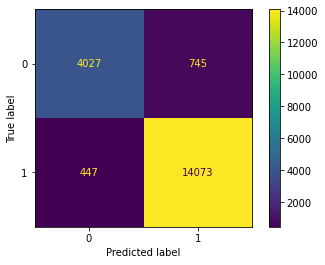

In [45]:
#style.use('classic')
cm = confusion_matrix(y_test, predicts, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot()

In [49]:
feature_names=np.array(vectorizer.get_feature_names())
print(feature_names)

['00' '000' '0000' ... 'աɨtɦ' 'աօʀҡ' '索尼大法好']


In [50]:
##Orden los parametros del modelo
sorted_coef_index=model.coef_[0].argsort()
print('Smallest coef: \n{}\n'.format(feature_names[sorted_coef_index[1:10]]))
print('Largest coef: \n{}\n'.format(feature_names[sorted_coef_index[-20:-10]]))

Smallest coef: 
['garbage' 'worst' 'crappy' 'junk' 'disappointed' 'useless' 'terrible'
 'worse' 'worthless']

Largest coef: 
['charm' 'fantastic' 'solid' 'amazing' 'bien' 'best' 'perfecto' 'awsome'
 'perfect' 'great']



In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vect = TfidfVectorizer(min_df=5).fit(X_train)
print(vect.get_feature_names()) 

['00', '000', '01', '02', '04', '05', '06', '07', '08', '09', '0c', '0mp', '10', '100', '1000', '10000', '100mb', '1020', '1080', '1080p', '109', '10pm', '10th', '11', '110', '11pm', '11th', '12', '120', '1200', '123', '125', '128', '1280', '1280x720', '128g', '128gb', '129', '12mp', '12th', '13', '130', '1300', '135', '139', '13mb', '13mp', '13th', '14', '140', '1400', '1440', '1440p', '149', '14th', '15', '150', '1500', '1520', '15th', '16', '160', '16g', '16gb', '16mp', '16nm', '16th', '17', '170', '1700', '175', '179', '18', '180', '1800', '189', '18th', '19', '1900', '1900mhz', '1920', '199', '1b', '1g', '1gb', '1ghz', '1hr', '1st', '20', '200', '2000', '2000mah', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '20th', '21', '2100', '2100mhz', '21st', '22', '220', '226', '22nd', '23', '230', '23th', '24', '240', '249', '24hrs', '24th', '25', '250', '256', '256gb', '25th', '26', '260', '2600', '27', '27th', '28', '280', '28th'

In [54]:
X_train_vectorizer = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorizer,y_train)
predictions = model.predict(vect.transform(X_test))
print('\n')
print('AUC: ',roc_auc_score(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,




AUC:  0.9081943511161296


In [60]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4772
           1       0.95      0.97      0.96     14520

    accuracy                           0.94     19292
   macro avg       0.92      0.91      0.92     19292
weighted avg       0.94      0.94      0.94     19292

[[ 4046   726]
 [  457 14063]]


In [67]:
print(model.predict(vect.transform(['que mal servicio', 'la bateria no rinde nada'])))

[0 0]


Realizamos la predicción con n-grams

In [ ]:
vect = CountVectorizer(min_df=5,ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)
predictions = model.predict(vect.transform(X_test))
print('\n')
print('AUC: ',roc_auc_score(y_test, predictions))

In [ ]:
print(model.predict(vect.transform(['not a issue, this phone is ok','an issue, this phone is not worink'])))